<a href="https://colab.research.google.com/github/YoErikson/Atividade_N2---1-Bim/blob/main/Atividade_N2_1BIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import re

In [10]:
from collections import Counter

In [11]:
import matplotlib.pyplot as plt

In [12]:
dfmovies = pd.read_csv('/content/movies.csv')
dfratings = pd.read_csv('/content/ratings.csv')

In [13]:
dfmovies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
dfratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
dfmovies['Ano Lancamento'] = dfmovies['title'].apply(lambda x: re.search(r'\d+', x).group() if re.search(r'\d+', x) else None)
print("\nDados com a nova coluna 'Ano Lancamento':")
print(dfmovies.head())


Dados com a nova coluna 'Ano Lancamento':
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres Ano Lancamento  
0  Adventure|Animation|Children|Comedy|Fantasy           1995  
1                   Adventure|Children|Fantasy           1995  
2                               Comedy|Romance           1995  
3                         Comedy|Drama|Romance           1995  
4                                       Comedy           1995  


In [16]:
df_merged = pd.merge(dfmovies, dfratings, on='movieId')
print("\nDados mesclados:")
print(df_merged.head())


Dados mesclados:
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

  Ano Lancamento  userId  rating   timestamp  
0           1995       1     4.0   964982703  
1           1995       5     4.0   847434962  
2           1995       7     4.5  1106635946  
3           1995      15     2.5  1510577970  
4           1995      17     4.5  1305696483  


##1(a) (10 pontos) Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?


In [17]:
correlacao = df_merged['Ano Lancamento'].astype(float).corr(df_merged['rating'])
print(f"\nCorrelação entre Ano Lancamento e rating: {correlacao}")


Correlação entre Ano Lancamento e rating: 0.02717037725242736


Com base no valor encontrado não existe coorelção

In [18]:
dfmovies['rotulos'] = dfmovies['genres'].apply(lambda x: x.count('|') + 1)
dfmovies.head()

,movieId,title,genres,Ano Lancamento,rotulos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,3
4,5,Father of the Bride Part II (1995),Comedy,1995,1


## 1(b) Qual o grupo mais disperso, o de usúarios que avaliaram ou o de usúarios que rotularam filmes?

In [25]:
print("Variância de usuários que rotularam:", dfmovies['rotulos'].var())
print()
print("Variância de usuários que avaliaram:", dfratings['rating'].var())
print()
print("Desvio padrão de usuários que rotularam:", dfmovies['rotulos'].std())
print()
print("Desvio padrão de usuários que avaliaram:", dfratings['rating'].std())

Variância de usuários que rotularam: 1.261687435644484

Variância de usuários que avaliaram: 1.08686721429614

Desvio padrão de usuários que rotularam: 1.1232486081204303

Desvio padrão de usuários que avaliaram: 1.0425292390605359


In [23]:
valores_unicos = set('|'.join(dfmovies['genres']).split('|'))
print(valores_unicos)

{'War', 'Drama', 'Action', 'Horror', 'Musical', 'Western', 'Comedy', 'Crime', 'Sci-Fi', 'Children', 'Adventure', 'Mystery', 'Film-Noir', 'IMAX', 'Romance', '(no genres listed)', 'Thriller', 'Fantasy', 'Documentary', 'Animation'}


## 1(c) Qual a categoria rotulada mais frequente?

In [24]:
contagem = Counter('|'.join(df1['genres']).split('|'))
df_contagem = pd.DataFrame(contagem.items(), columns=['valor', 'frequencia']).sort_values(by='frequencia', ascending=False)
print(df_contagem)

NameError: name 'df1' is not defined

In [21]:
categorias = '|'.join(dfmovies['genres']).split('|')
frequencia_categorias = Counter(categorias)
mais_frequente = frequencia_categorias.most_common(1)
print(f"\nA categoria mais frequente é '{mais_frequente[0][0]}' com {mais_frequente[0][1]} ocorrências.")


A categoria mais frequente é 'Drama' com 4361 ocorrências.


## 1(d) (10 pontos) Como estão distribúıdas as avaliações ao longo do tempo?


In [20]:
dfratings['data_hora'] = pd.to_datetime(dfratings['timestamp'], unit='s')
dfratings['ano'] = dfratings['data_hora'].dt.year
dfratings['mes'] = dfratings['data_hora'].dt.month
dfratings['dia'] = dfratings['data_hora'].dt.day
dfratings['hora'] = dfratings['data_hora'].dt.hour

dfratings.head()


,userId,movieId,rating,timestamp,data_hora,ano,mes,dia,hora
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000,7,30,18
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000,7,30,18
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000,7,30,18
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000,7,30,19
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000,7,30,18


In [28]:
contagem_anos = dfratings['ano'].value_counts().reset_index()
contagem_anos.columns = ['ano', 'frequencia']

# Exibir o resultado
print(contagem_anos)

     ano  frequencia
0   2000       10061
1   2017        8198
2   2007        7114
3   2016        6703
4   2015        6616
5   2018        6418
6   1996        6040
7   2005        5813
8   2012        4656
9   2008        4351
10  2009        4158
11  2006        4059
12  2003        4014
13  2001        3922
14  2002        3478
15  2004        3279
16  1999        2439
17  2010        2301
18  1997        1916
19  2011        1690
20  2013        1664
21  2014        1439
22  1998         507


Correlação entre ano e frequência: 0.20198814337897394


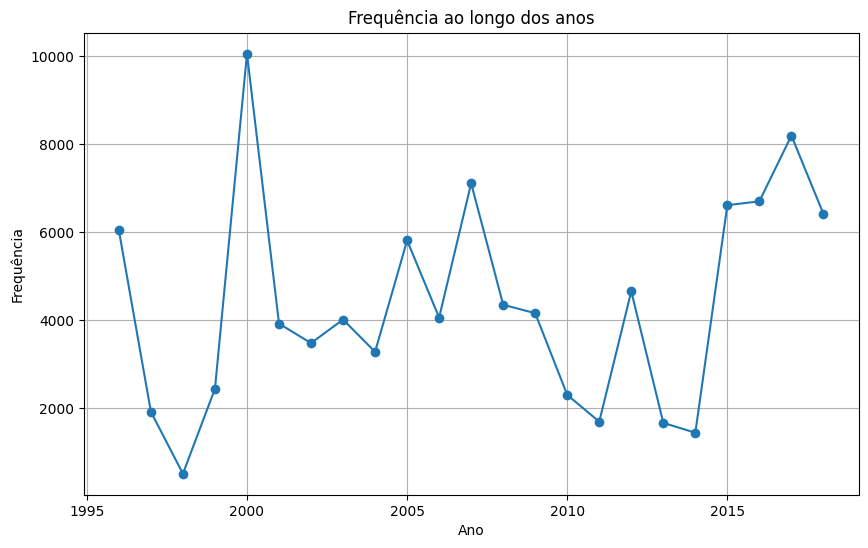

In [31]:
contagem_anos = contagem_anos.sort_values(by='ano')
correlacao = contagem_anos['ano'].corr(contagem_anos['frequencia'])
print(f"Correlação entre ano e frequência: {correlacao}")
plt.figure(figsize=(10, 6))
plt.plot(contagem_anos['ano'], contagem_anos['frequencia'], marker='o')
plt.title('Frequência ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid()
plt.show()

A análise mostra que o ano de maior frequência foi 2000, com 10.061 avaliações, enquanto o ano de menor frequência foi 1998, com apenas 507 avaliações. Entre os anos de 2004 e 2006, houve uma estagnação relativa, com as frequências variando de 3.279 a 4.059, mostrando pouca variação nesse período. A frequência ao longo dos anos apresentou flutuações, sem uma tendência clara de crescimento ou diminuição contínua.

In [91]:
#Base escolhida Tags

dftags = pd.read_csv('/content/tags.csv')
dftags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


##2) I Quantas tags diferentes foram rotuladas na base de dados tags.csv?

In [94]:


quantidade_textos_unicos = dftags['tag'].nunique()

print("Quantidade de tag diferentes:", quantidade_textos_unicos)

Quantidade de tag diferentes: 1589


##2) II Quais foram as 5 tags mais escolhidas, juntamente com a quantidade de vezes que apareceu.

In [97]:


contagem_tags = dftags['tag'].value_counts().reset_index()
contagem_tags.columns = ['tag', 'frequencia']
contagem_tags.head(5)


,tag,frequencia
0,In Netflix queue,131
1,atmospheric,36
2,thought-provoking,24
3,superhero,24
4,funny,23


In [100]:
dflinks = pd.read_csv('/content/links.csv')
dflinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [116]:
print(dflinks.columns)

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


##Encontrar o link com o maior valor de tmdbId

##2) III Usando o DataFrame Links

In [124]:

link_maior_tmdbId = dflinks.loc[dflinks['tmdbId'].idxmax()]
link_menor_tmdbId = dflinks.loc[dflinks['tmdbId'].idxmin()]
cinco_maiores_tmdbId = dflinks.nlargest(5, 'tmdbId')
cinco_menores_tmdbId = dflinks.nsmallest(5, 'tmdbId')

print("O link com o maior valor de tmdbId é:")
print()
print(link_maior_tmdbId)
print()
print("O link com o menor valor de tmdbId é:")
print()
print(link_menor_tmdbId)
print()
print("Os 5 maiores valores de tmdbId e seus detalhes são:")
print()
print(cinco_maiores_tmdbId)
print()
print("\nOs 5 menores valores de tmdbId e seus detalhes são:")
print()
print(cinco_menores_tmdbId)



O link com o maior valor de tmdbId é:

movieId     189111.0
imdbId     5359048.0
tmdbId      525662.0
Name: 9719, dtype: float64

O link com o menor valor de tmdbId é:

movieId     4470.0
imdbId     94675.0
tmdbId         2.0
Name: 3303, dtype: float64

Os 5 maiores valores de tmdbId e seus detalhes são:

      movieId   imdbId    tmdbId
9719   189111  5359048  525662.0
585       720   118114  503475.0
9690   184257  5189670  502892.0
9695   184791  7924798  502616.0
9702   185135  1665071  500609.0


Os 5 menores valores de tmdbId e seus detalhes são:

      movieId  imdbId  tmdbId
3303     4470   94675     2.0
17         18  113101     5.0
417       479  107286     6.0
224       260   76759    11.0
4360     6377  266543    12.0
